In [8]:
# for data preprocessing
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for label_encoding
from sklearn.preprocessing import LabelEncoder
#for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [10]:
# loading data
df = pd.read_csv('Titanic-Dataset.csv')

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# Reading first rows of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Reading last rows of data
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
# unique vales of Cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
# let's see if our data have null values
# now we see that there are nulls in Age and Cabin and Embarked column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# let's deal with nulls by mean & mode & median

# Fill missing values in 'Age' column with the mode
df['Age'] = df['Age'].fillna(df['Age'].mode().iloc[0])

# Fill missing values in 'Cabin' column with the mode
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode().iloc[0])

# Fill missing values in 'Embarked' column with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])
# checking if there are nulls after filling them by mode (the most frequent value)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

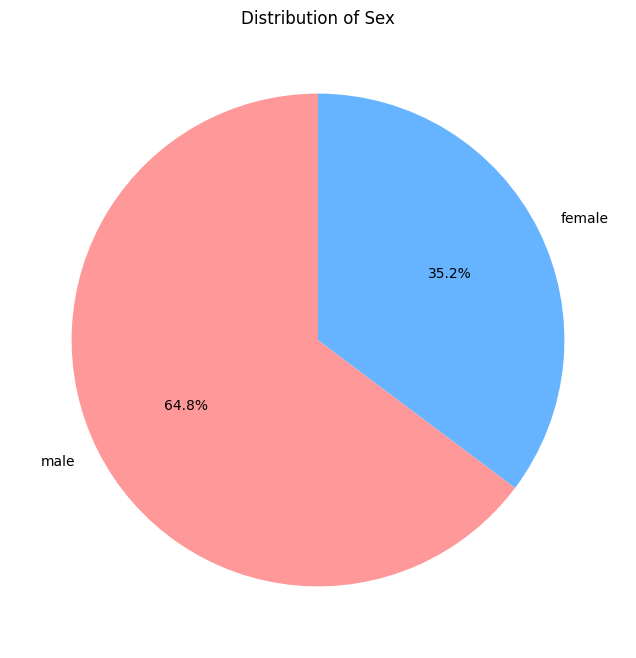

In [17]:
# the visualization Distribution of Sex
Sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Sex_counts, labels=Sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Sex')
plt.show()

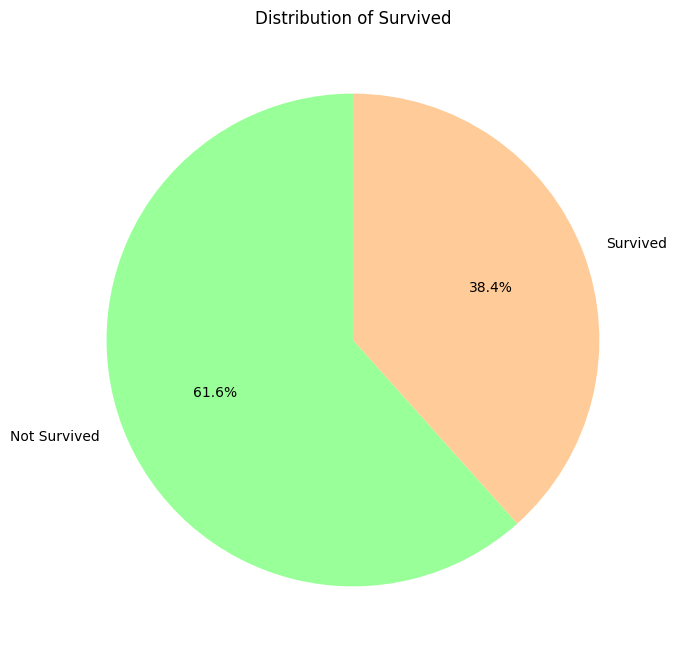

In [18]:
# Mapping 0 and 1 to more descriptive labels to make visualization more clear
df['Survived_mapping'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
# the visualization Distribution of Survived
Survived_mapping_counts = df['Survived_mapping'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Survived_mapping_counts, labels=Survived_mapping_counts.index, autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#ffcc99'])
plt.title('Distribution of Survived')
plt.show()

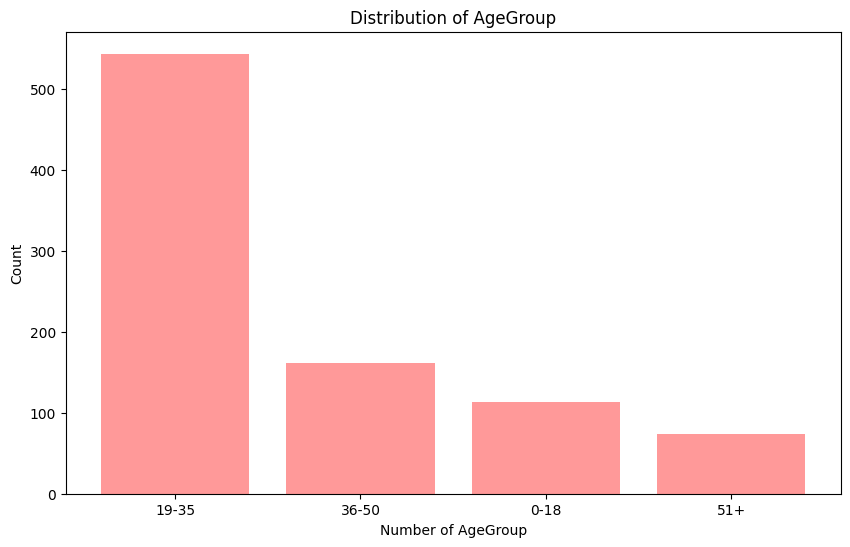

In [19]:
# Here we mapping age for making the visualization more clear

age_bins = [0, 18, 35, 50, 100]
age_labels = ['0-18', '19-35', '36-50', '51+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
# visualization of Distribution of AgeGroup
AgeGroup_counts = df['AgeGroup'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(AgeGroup_counts.index, AgeGroup_counts.values,color='#ff9999')
plt.xlabel('Number of AgeGroup')
plt.ylabel('Count')
plt.title('Distribution of AgeGroup')
plt.show()

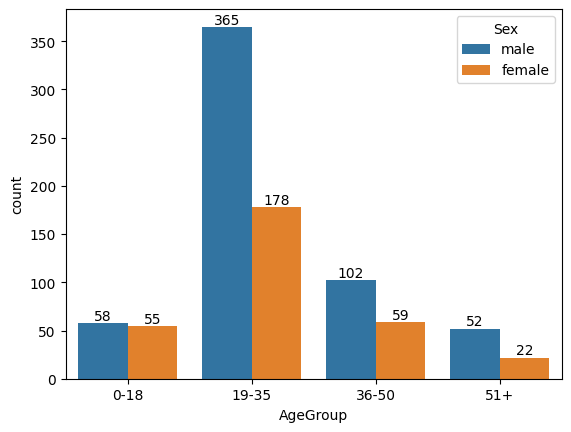

In [20]:
# AgeGroup groupby Sex visualization
ax = sns.countplot(data = df, x = 'AgeGroup', hue = 'Sex')
for bars in ax.containers:
    ax.bar_label(bars)

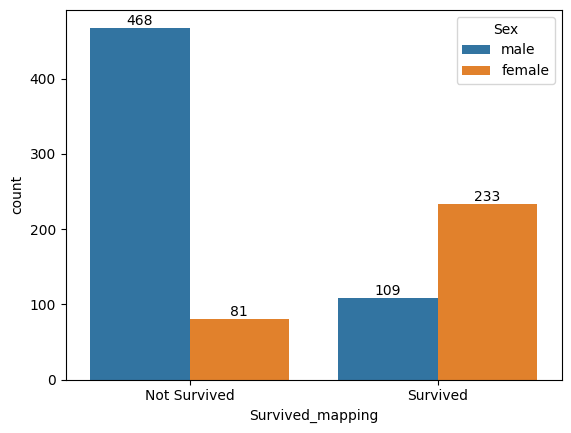

In [21]:
# Survived groupby Sex visualization
ax = sns.countplot(data = df, x = 'Survived_mapping', hue = 'Sex')
for bars in ax.containers:
    ax.bar_label(bars)

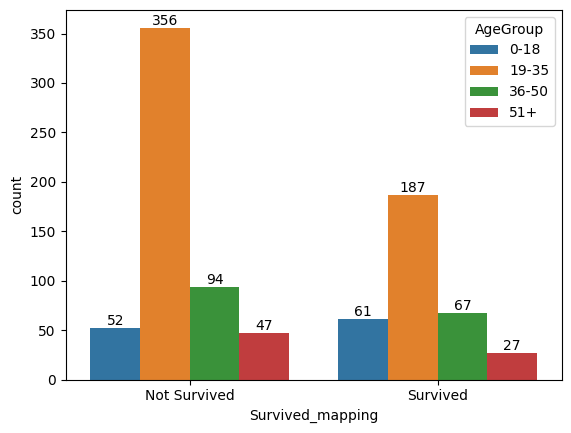

In [22]:
# Survived groupby AgeGroup visualization
ax = sns.countplot(data = df, x = 'Survived_mapping', hue = 'AgeGroup')
for bars in ax.containers:
    ax.bar_label(bars)

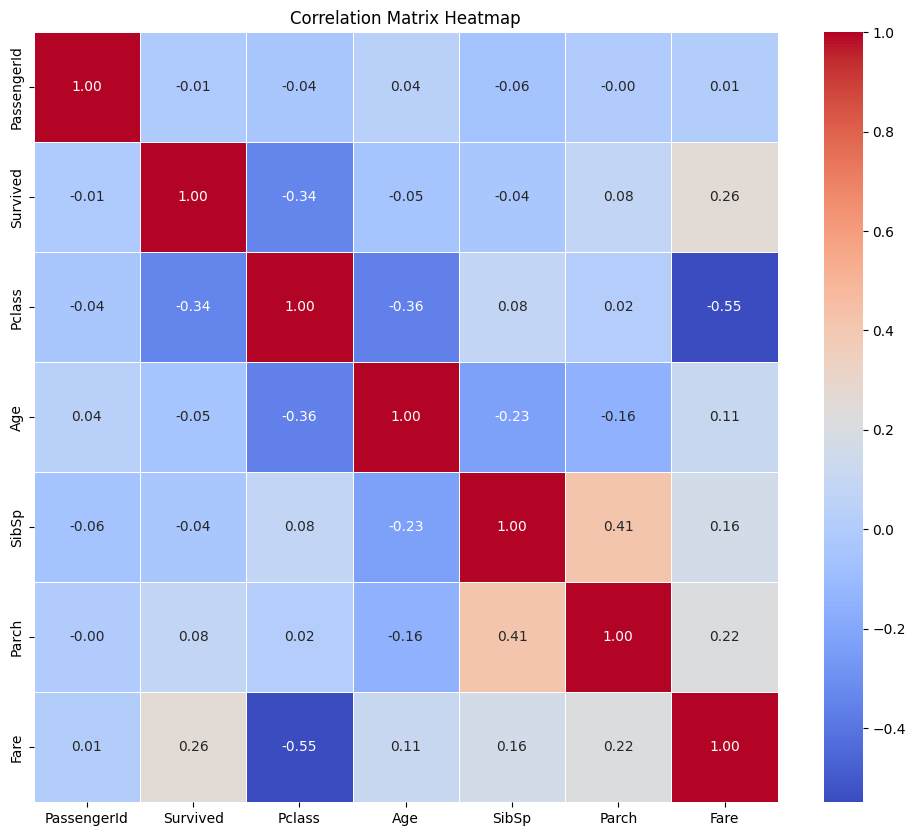

In [23]:
# Now select only numeric columns
numeric_df_encoded = df.select_dtypes(include=['number'])

correlation_matrix_encoded = numeric_df_encoded.corr()

# Create a heatmap for the encoded dataframe
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()